In [1]:
# coding: utf-8

import matplotlib.pyplot as plt
import numpy as np
from pylab import *
%matplotlib inline

class PitmanYor:
        def __init__(self, alpha, beta):       
                self.alpha = alpha #param of Pitman-Yor process. 
                self.beta = beta   #param of Pitman-Yor process. When beta == 0.0, it means Dirichlet Process
                self.tables = []  #when tables[i] = j , the number of people in table i is j
                self.tables_num = [] # when n th people get a seat , the number of tables is appended on this array's n th element

        def alpha_beta_setter(self, alpha, beta):
                self.alpha = alpha
                self.beta = beta

        def make_tables(self, sum_people):
                self.tables = []
                self.tables_num = []

                for n in range(sum_people):
                        tables_prob = []
                        for p_in_table in self.tables:
                                tables_prob.append(
                                        (p_in_table - self.beta) / ( n + self.alpha)
                                )
                        tables_prob.append(
                                (self.alpha + self.beta * len(self.tables)) / (n + self.alpha)
                        )
                        
                        choosed_table = np.nonzero(np.random.multinomial(1, tables_prob))[0][0]#generate random number which follow Pitman-Yor Process(when self.beta == 0.0, Dirichlet Process)

                        if choosed_table == len(self.tables):
                                self.tables.append(1)
                        else:
                                self.tables[choosed_table] += 1
                        self.tables_num.append(len(self.tables))

        def get_graph_parts(self):
                return [range(len(self.tables_num)), self.tables_num, range(len(self.tables)), self.get_sorted_tables()]
               
        def get_sorted_tables(self):
                sorted_tables =self.tables.copy()
                sorted_tables.sort()
                sorted_tables.reverse()

                return sorted_tables

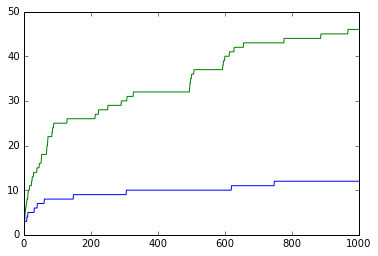

In [2]:
crp_items = []
crp = PitmanYor(2, 0.0)
crp.make_tables(1000)
crp_items.append(crp.get_graph_parts())

crp.alpha_beta_setter(10, 0.0)
crp.make_tables(1000)
crp_items.append(crp.get_graph_parts())

#show Figure11.5
plot(crp_items[0][0], crp_items[0][1], "b", crp_items[1][0],crp_items[1][1], "g")

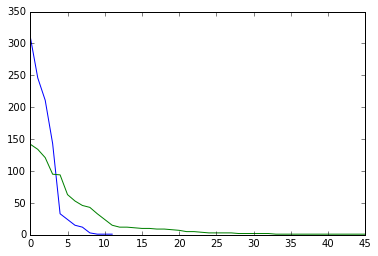

In [3]:
#show Figure11.6
plot(crp_items[0][2], crp_items[0][3], "b", crp_items[1][2], crp_items[1][3], "g")

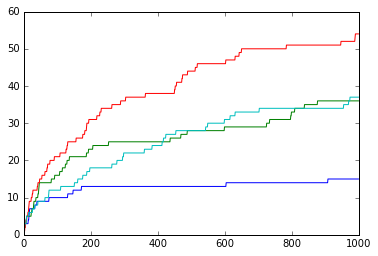

In [4]:
pit_items = []

pit = PitmanYor(2, 0.0)
pit.make_tables(1000)
pit_items.append(pit.get_graph_parts())

pit.alpha_beta_setter(2, 0.2)
pit.make_tables(1000)
pit_items.append(pit.get_graph_parts())

pit.alpha_beta_setter(2, 0.3)
pit.make_tables(1000)
pit_items.append(pit.get_graph_parts())

pit.alpha_beta_setter(2, 0.4)
pit.make_tables(1000)
pit_items.append(pit.get_graph_parts())

#show Figure11.7
plot(pit_items[0][0], pit_items[0][1], "b", pit_items[1][0], pit_items[1][1], "g", pit_items[2][0], pit_items[2][1], "r", pit_items[3][0], pit_items[3][1], "c" )

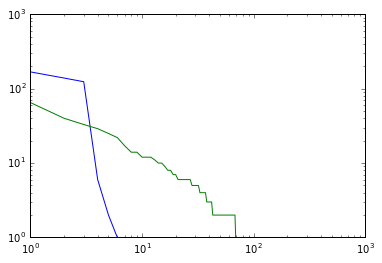

In [5]:
pit_items = []

pit = PitmanYor(2, 0.0)
pit.make_tables(1000)
memo = pit.get_graph_parts()
pit_items.append(memo[2])
pit_items.append(memo[3])

pit.alpha_beta_setter(2, 0.8)
pit.make_tables(1000)
memo = pit.get_graph_parts()
pit_items.append(memo[2])
pit_items.append(memo[3])

#show Figure11.8(in zokupata, the number of tables is 10^5, but in this program, 1000 )
plt.xscale("log")
plt.yscale("log")  
plot(pit_items[0], pit_items[1], "b", pit_items[2],pit_items[3], "g")